## Notebook for tuning opsin response.
### Currently the notebook is setup to deliver 100Hz spike train to the opsin and then record how the channel and cell. There are two inputs
1. stable 
    * 100Hz for 200ms so a total of 20 light pulses
2. unstable
    * 100Hz but only for 2ms so only 1 light pulse

In [1]:
from neuron import h
import numpy as np

# load neuron files
h.load_file('stdrun.hoc')
h.load_file('templates.hoc')

# Simulation control
h.secondorder = 2
h.dt = 0.05  
h.steps_per_ms = 1 / h.dt
h.tstop = 400 
h.celsius = 31
v_init = -70

# read cell
cell = h.CP_Cell()

# Read pulse file
pulse_file = "./stable.txt"
pulse_rec = np.loadtxt(pulse_file)  # Load pulse data

# ChR2 setup
soma1_p = h.ChR2_william_event(cell.soma[0](0.5))
soma1_p.nPulses = 1
soma1_p.Dt_on = 2
soma1_p.Dt_off = (1 / 10 * 1000) - 5
soma1_p.gmax = 0.04
soma1_p.tauChR2 = 0.4
soma1_p.Gd1 = 0.25
soma1_p.Gd2 = 0.5
soma1_p.light_intensity = 3 # This would change based of depth
soma1_p.wavelength = 523 # dont think this matter much 

# Optogenetic stimulation
input_vec = h.Vector(pulse_rec)
vec_stim = h.VecStim()
vec_stim.play(input_vec)

opto = h.NetCon(vec_stim, soma1_p)
opto.weight[0] = 1
opto.delay = 0

# Record variables
t = h.Vector().record(h._ref_t)
v = h.Vector().record(cell.soma[0](0.5)._ref_v)
i = h.Vector().record(soma1_p._ref_i)

# Run simulation
h.finitialize(v_init)
h.run()

--No graphics will be displayed.


0.0

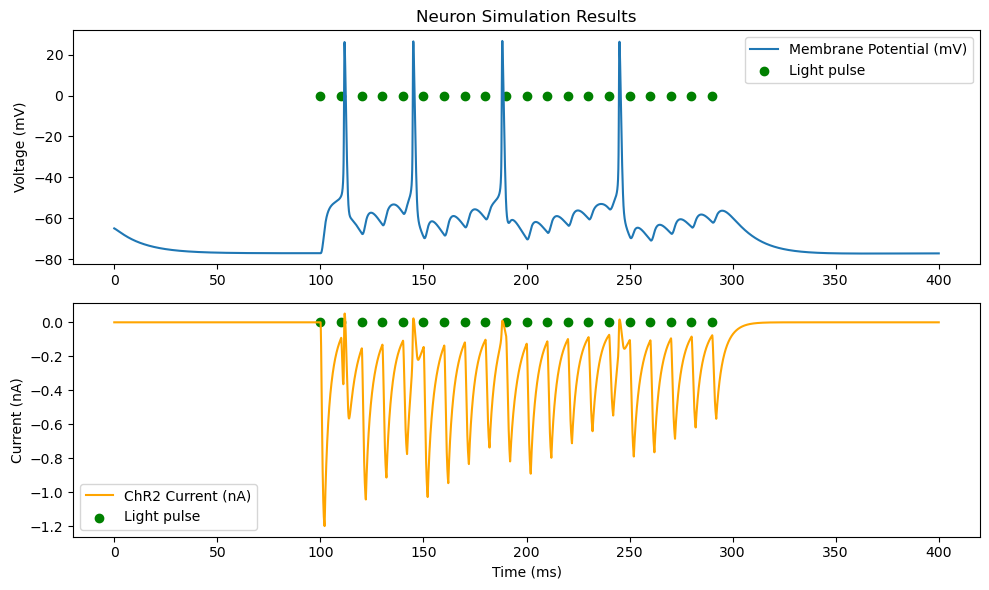

In [2]:
import matplotlib.pyplot as plt

y = []
for j in range(len(pulse_rec)):
    y.append(0)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].plot(t, v, label="Membrane Potential (mV)")
ax[0].scatter(pulse_rec, [0] * len(pulse_rec), label='Light pulse', c='g')
ax[0].set_ylabel("Voltage (mV)")
ax[0].set_title("Neuron Simulation Results")
ax[0].legend()


ax[1].plot(t, i, label="ChR2 Current (nA)", color="orange")
ax[1].scatter(pulse_rec, [0] * len(pulse_rec), label='Light pulse', c='g')
ax[1].set_xlabel("Time (ms)")
ax[1].set_ylabel("Current (nA)")
ax[1].legend()


plt.tight_layout()

# Show the plot
plt.show()